In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import my_functions as mf
from matplotlib.colors import LogNorm
from matplotlib import cm
from scipy.interpolate import RegularGridInterpolator

In [2]:
%matplotlib inline

###  points of a 3D grid

In [3]:
xmin = 1.
xmax = 110.
xn = 15
x = np.linspace(xmin,xmax,xn)

ymin = 55.
ymax = 220.
yn = 25
y = np.linspace(ymin,ymax,yn)

zmin = 15
zmax = 251
zn =  30
z = np.linspace(zmin,zmax,zn)

X,Y,Z = np.meshgrid(x,y,z,indexing='ij')

### Data

In [4]:
rho_m = 100*X*Y*Z/(X**2 + Y**2 + Z**2)

print(rho_m.shape)

(15, 25, 30)


### Select area and data points from 3D grid

In [5]:
xgrid,ygrid,zgrid,xa,ya,za,rho = mf.select_area(1,110,55,220,15,251,x,y,z,rho_m)

In [6]:
rho1 = np.ravel(rho)
lx,ly,lz = rho.shape
print(rho.shape)

(15, 25, 30)


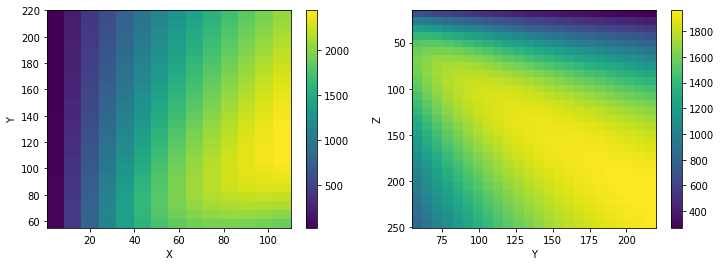

In [7]:
mx,my = np.meshgrid(xa,ya,indexing='ij')
my1,mz1 = np.meshgrid(ya,za,indexing='ij')

z_plot = np.argmin(np.abs(z-50))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.pcolor(mx,my,rho[:,:,5])
plt.xlim(np.min(mx),np.max(mx))
plt.ylim(np.min(ya),np.max(ya))
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(1,2,2)
plt.pcolor(my1,mz1,rho[5,:,:])
plt.xlim(np.min(ya),np.max(ya))
plt.ylim(np.max(za),np.min(za))
plt.xlabel('Y')
plt.ylabel('Z')
plt.colorbar()

plt.show()

### Define control points for interpolation 

In [8]:
# Control points

c1 = np.copy(xa)+1
c2 = np.copy(ya)+1
c3 = np.copy(za)+1

Xc,Yc,Zc = np.meshgrid(c1,c2,c3,indexing='ij')


xc = np.ravel(Xc)
yc = np.ravel(Yc)
zc = np.ravel(Zc)

ln = xc.size

In [9]:
xc.size,yc.size,zc.size

(11250, 11250, 11250)

In [10]:
xgrid.size,ygrid.size,zgrid.size

(11250, 11250, 11250)

### Calculate interpolation matrix A

In [11]:
# Calculate interpolation function
t = 0.8
A = mf.calc_A_by_column(xgrid,ygrid,zgrid,xc,yc,zc,1,t)

In [12]:
H = np.dot(A.T,A)

In [13]:
h0 = np.trace(H)/ln

In [14]:
mu = 1E-12*h0
print( mu)

1.1129935567382783e-08


In [15]:
p = np.linalg.solve(H+(mu*np.identity(ln)),np.dot(A.T,rho1))

Check if A recovers data

In [16]:
rho0 = np.dot(A,p)
rho0_m = rho0.reshape((lx,ly,lz))

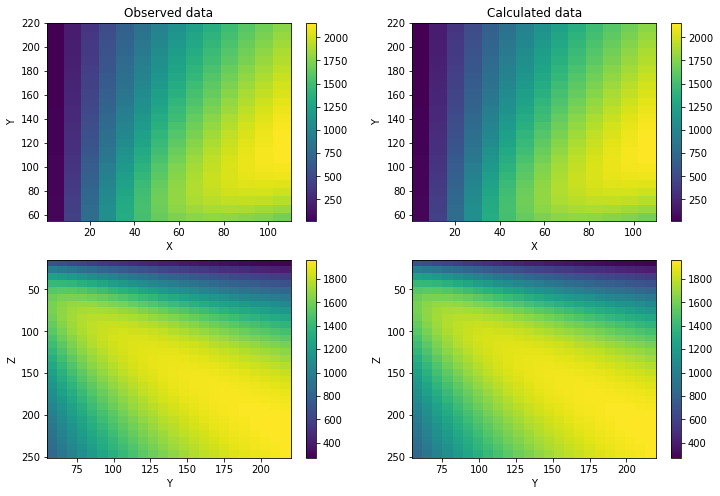

In [17]:
mx,my = np.meshgrid(xa,ya,indexing='ij')
my1,mz1 = np.meshgrid(ya,za,indexing='ij')

zplot = np.argmin(np.abs(za-50))

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title('Observed data')
plt.pcolor(mx,my,rho[:,:,zplot])
plt.xlim(np.min(mx),np.max(mx))
plt.ylim(np.min(ya),np.max(ya))
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(2,2,2)
plt.title('Calculated data')
plt.pcolor(mx,my,rho0_m[:,:,zplot])
plt.xlim(np.min(mx),np.max(mx))
plt.ylim(np.min(ya),np.max(ya))
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(2,2,3)
plt.pcolor(my1,mz1,rho[5,:,:])
plt.xlim(np.min(ya),np.max(ya))
plt.ylim(np.max(za),np.min(za))
plt.xlabel('Y')
plt.ylabel('Z')
plt.colorbar()

plt.subplot(2,2,4)
plt.pcolor(my1,mz1,rho0_m[5,:,:])
plt.xlim(np.min(ya),np.max(ya))
plt.ylim(np.max(za),np.min(za))
plt.xlabel('Y')
plt.ylabel('Z')
plt.colorbar()

plt.show()

### Interpolation points 

In [18]:
# #Interpolation points

dx0 = (xa[1:]+xa[:-1])/2
dy0 = (ya[1:]+ya[:-1])/2
dz0 = (za[1:]+za[:-1])/2

# dx1 = np.copy(x1)
# dy1 = np.copy(y1)
# dz1 = np.copy(z1)

x0n = len(dx0)
y0n = len(dy0)
z0n = len(dz0)

X0,Y0,Z0 = np.meshgrid(dx0,dy0,dz0,indexing='ij')

x0 = np.ravel(X0)
y0 = np.ravel(Y0)
z0 = np.ravel(Z0)

# Data at interpolation points

rho_0real = 100*X0*Y0*Z0/(X0**2 + Y0**2 + Z0**2)

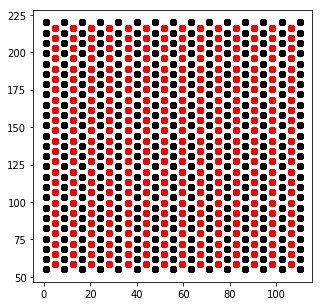

In [19]:
plt.figure(figsize=(5,5))
plt.plot(x0,y0,'ro')
plt.plot(xgrid,ygrid,'ko')

### Calculate matrix A at interpolation points

In [20]:
A0 = mf.calc_A_by_column(x0,y0,z0,xc,yc,zc,1,t)

In [21]:
# Interpolated data

rho0 = np.dot(A0,p)
rho0_m = rho0.reshape((x0n,y0n,z0n))

In [22]:
rho0_m.shape

(14, 24, 29)

In [23]:
#mf.plot_function_6sub(50,70,50,dx1,dy1,dz1,dx1,dy1,dz1,rho_0real,rho0_m)

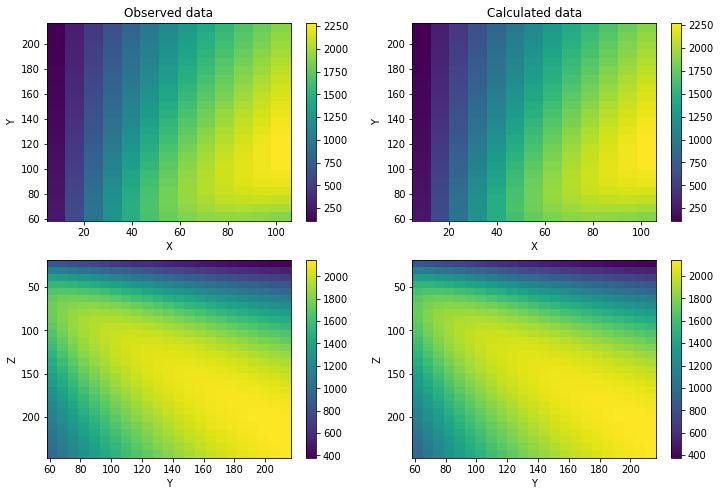

In [46]:
mx,my = np.meshgrid(dx0,dy0,indexing='ij')
my1,mz1 = np.meshgrid(dy0,dz0,indexing='ij')

zplot = np.argmin(np.abs(dz0-50))

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title('Observed data')
plt.pcolor(mx,my,rho_0real[:,:,zplot])
plt.xlim(np.min(mx),np.max(mx))
plt.ylim(np.min(my),np.max(my))
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(2,2,2)
plt.title('Calculated data')
plt.pcolor(mx,my,rho0_m[:,:,zplot])
plt.xlim(np.min(mx),np.max(mx))
plt.ylim(np.min(my),np.max(my))
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(2,2,3)
plt.pcolor(my1,mz1,rho_0real[5,:,:])
plt.xlim(np.min(my1),np.max(my1))
plt.ylim(np.max(mz1),np.min(mz1))
plt.xlabel('Y')
plt.ylabel('Z')
plt.colorbar()

plt.subplot(2,2,4)
plt.pcolor(my1,mz1,rho0_m[5,:,:])
plt.xlim(np.min(my1),np.max(my1))
plt.ylim(np.max(mz1),np.min(mz1))
plt.xlabel('Y')
plt.ylabel('Z')
plt.colorbar()

plt.show()

### Python interpolating function 

In [50]:
my_interpolating_function = RegularGridInterpolator((xa, ya, za), rho, method='linear')

In [51]:
pts = np.array([])

for i in range(len(x0)):
    aux = np.array([x0[i],y0[i],z0[i]])
    pts = np.hstack((pts,aux))
    
pts = pts.reshape(len(x0),3)

In [52]:
rho2 = my_interpolating_function(pts)

In [53]:
rho2_m = rho2.reshape(x0n,y0n,z0n)

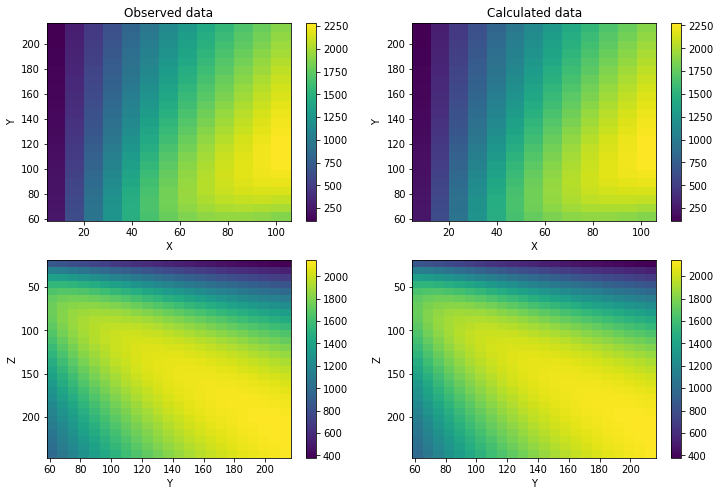

In [54]:
mx,my = np.meshgrid(dx0,dy0,indexing='ij')
my1,mz1 = np.meshgrid(dy0,dz0,indexing='ij')

zplot = np.argmin(np.abs(dz0-50))

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title('Observed data')
plt.pcolor(mx,my,rho_0real[:,:,zplot])
plt.xlim(np.min(mx),np.max(mx))
plt.ylim(np.min(my),np.max(my))
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(2,2,2)
plt.title('Calculated data')
plt.pcolor(mx,my,rho2_m[:,:,zplot])
plt.xlim(np.min(mx),np.max(mx))
plt.ylim(np.min(my),np.max(my))
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(2,2,3)
plt.pcolor(my1,mz1,rho_0real[5,:,:])
plt.xlim(np.min(my1),np.max(my1))
plt.ylim(np.max(mz1),np.min(mz1))
plt.xlabel('Y')
plt.ylabel('Z')
plt.colorbar()

plt.subplot(2,2,4)
plt.pcolor(my1,mz1,rho2_m[5,:,:])
plt.xlim(np.min(my1),np.max(my1))
plt.ylim(np.max(mz1),np.min(mz1))
plt.xlabel('Y')
plt.ylabel('Z')
plt.colorbar()

plt.show()